# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip3 install wordcloud
!pip3 install fileupload
!pip3 install ipywidgets
!pip3 install pandas
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

import pandas as pd
import string

  Using cached https://files.pythonhosted.org/packages/05/e7/52e4bef8e2e3499f6e96cc8ff7e0902a40b95014143b062acde4ff8b9fc8/wordcloud-1.8.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5f/19/d4c25111d36163698396f93c363114cf1cddbacb24744f6612f25b6aa3d0/Pillow-8.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a6/fc/36e52d0ae2aa502b211f1bcd2fdeec72d343d58224eabcdddc1bcb052db1/numpy-1.19.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/43/2bd63467490036697e7be71444fafc7b236923d614d4521979a200c6b559/matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a7/1b/cbd8ae738719b5f41592a12057ef5442e2ed5f5cb5451f8fc7e9f8875a1a/kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-

  Using cached https://files.pythonhosted.org/packages/06/74/9b387472866358ebc08732de3da6dc48e44b0aacd2ddaa5cb85ab7e986a2/defusedxml-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a8/6f/c34288766797193b512c6508f5994b830fb06134fdc4ca8214daba0aa443/jupyterlab_pygments-0.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/ec/4b43dae793655b7d8a25f76119624350b4d65eb663459eb9603d7f1f0345/mistune-0.8.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/c8/b7ed0dfea5cb287907bd22c5ff7c3ed0a65b346f2a4cf916eb9e83be66b3/bleach-3.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/8f/51e89ce52a085483359217bc72cdbf6e75ee595d5b1d4b5ade40c7e018b8/jsonschema-3.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhost

  Using cached https://files.pythonhosted.org/packages/6c/7b/7ac231c20d2d33c445eaacf8a433f4e22c60677eb9776c7c5262d7ddee2d/widgetsnbextension-3.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/6a/210816c943c9aeeb29e4e18a298f14bf0e118fe222a23e13bfcc2d41b0a4/ipython-7.16.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/19/c2812690d8b340987eecd2cbc18549b1d130b94c5d97fcbe49f5f8710edf/ipykernel-5.3.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/8f/51e89ce52a085483359217bc72cdbf6e75ee595d5b1d4b5ade40c7e018b8/jsonschema-3.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/34/ba811d7e4b5374e70fc3801d932966979e252e5c1a99eddb32ce63ec54e6/jupyter_core-4.7.0-py3-none-any.whl
  Using cached https://files.pythonhost

  Using cached https://files.pythonhosted.org/packages/1c/1a/90fa7e7ee05d91d0339ef264bd8c008f57292aba4a91ec512a0bbb379d1d/cffi-1.14.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/ec/4b43dae793655b7d8a25f76119624350b4d65eb663459eb9603d7f1f0345/mistune-0.8.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/c8/b7ed0dfea5cb287907bd22c5ff7c3ed0a65b346f2a4cf916eb9e83be66b3/bleach-3.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/9e/1a170feaa54f22aeb5a5d16c9015e82234275a3c8ab630b552493f9cb8a9/testpath-0.4.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/06/74/9b387472866358ebc08732de3da6dc48e44b0aacd2ddaa5cb85ab7e986a2/defusedxml-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.o

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [26]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
    print("The button should have come by now. If it has not, don't worry. You can manually change the contents of the text.tst and make it run")

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The button should have come by now. If it has not, don't worry. You can manually change the contents of the text.tst and make it run


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [4]:

def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    
    file_word = file_contents.lower()
    
    punc = [punc for punc in punctuations]
    
    frequencies = {}
    
    for p in punc:
        # replace them in the text
        file_word = file_word.replace(p, "" )
    
    # this should have removed all the punctuation marks
    
    file_word = file_word.split()
    file_word_final = []
    
    for word in file_word:
        # if it contains a number, good else, remove it
        if word.isalpha():
            file_word_final.append(word)
            
    
    for word in file_word_final:
        # check if the word is uninteresting
        if word not in uninteresting_words:
            if word not in frequencies:
                frequencies[word] = 0
            frequencies[word] += 1
            
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

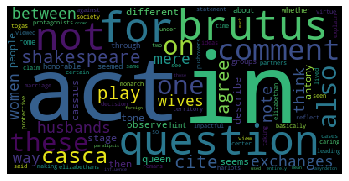

In [25]:
# Display your wordcloud image

days_file = open("test.txt",'r')
file_contents = days_file.read()

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!